# Import the packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from datetime import datetime

# Importing the data

In [9]:
data = pd.read_csv('btc.csv')
data

,Date,Price,Open,High,Low,Vol.,Change %
0,"Feb 03, 2023","23,572.1","23,429.1","23,694.1","23,262.8",392.05K,0.62%
1,"Feb 02, 2023","23,427.6","23,726.2","24,207.2","23,398.1",382.86K,-1.26%
2,"Feb 01, 2023","23,725.6","23,124.7","23,784.5","22,809.6",333.18K,2.60%
3,"Jan 31, 2023","23,125.1","22,832.2","23,262.9","22,724.9",289.38K,1.28%
4,"Jan 30, 2023","22,832.2","23,746.0","23,794.0","22,560.0",339.62K,-3.88%
...,...,...,...,...,...,...,...
4579,"Jul 22, 2010",0.1,0.1,0.1,0.1,2.16K,0.00%
4580,"Jul 21, 2010",0.1,0.1,0.1,0.1,0.58K,0.00%
4581,"Jul 20, 2010",0.1,0.1,0.1,0.1,0.26K,0.00%
4582,"Jul 19, 2010",0.1,0.1,0.1,0.1,0.57K,0.00%


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4584 entries, 0 to 4583
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Date      4584 non-null   object
 1   Price     4584 non-null   object
 2   Open      4584 non-null   object
 3   High      4584 non-null   object
 4   Low       4584 non-null   object
 5   Vol.      4584 non-null   object
 6   Change %  4584 non-null   object
dtypes: object(7)
memory usage: 250.8+ KB


In [11]:
data.isnull().sum()

Date        0
Price       0
Open        0
High        0
Low         0
Vol.        0
Change %    0
dtype: int64

In [12]:
data['Date'] = pd.to_datetime(data['Date'])

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4584 entries, 0 to 4583
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      4584 non-null   datetime64[ns]
 1   Price     4584 non-null   object        
 2   Open      4584 non-null   object        
 3   High      4584 non-null   object        
 4   Low       4584 non-null   object        
 5   Vol.      4584 non-null   object        
 6   Change %  4584 non-null   object        
dtypes: datetime64[ns](1), object(6)
memory usage: 250.8+ KB


In [14]:
dt = data.set_index('Date')
dt.head()

,Price,Open,High,Low,Vol.,Change %
Date,,,,,,
2023-02-03,"23,572.1","23,429.1","23,694.1","23,262.8",392.05K,0.62%
2023-02-02,"23,427.6","23,726.2","24,207.2","23,398.1",382.86K,-1.26%
2023-02-01,"23,725.6","23,124.7","23,784.5","22,809.6",333.18K,2.60%
2023-01-31,"23,125.1","22,832.2","23,262.9","22,724.9",289.38K,1.28%
2023-01-30,"22,832.2","23,746.0","23,794.0","22,560.0",339.62K,-3.88%


In [15]:
dt_price = dt[['Price']]

In [16]:
dt_price = dt_price.sort_index(ascending=True)
dt_price

,Price
Date,
2010-07-18,0.1
2010-07-19,0.1
2010-07-20,0.1
2010-07-21,0.1
2010-07-22,0.1
...,...
2023-01-30,"22,832.2"
2023-01-31,"23,125.1"
2023-02-01,"23,725.6"


In [17]:
dt_price['Price'] = dt_price['Price'].str.replace(',','').astype('float')
dt_price

,Price
Date,
2010-07-18,0.1
2010-07-19,0.1
2010-07-20,0.1
2010-07-21,0.1
2010-07-22,0.1
...,...
2023-01-30,22832.2
2023-01-31,23125.1
2023-02-01,23725.6


In [18]:
btc_price = dt_price['Price']
btc_price

Date
2010-07-18        0.1
2010-07-19        0.1
2010-07-20        0.1
2010-07-21        0.1
2010-07-22        0.1
               ...   
2023-01-30    22832.2
2023-01-31    23125.1
2023-02-01    23725.6
2023-02-02    23427.6
2023-02-03    23572.1
Name: Price, Length: 4584, dtype: float64

In [19]:
#infer the frequency of the data
btc_price = btc_price.asfreq(pd.infer_freq(btc_price.index))
btc_price

Date
2010-07-18        0.1
2010-07-19        0.1
2010-07-20        0.1
2010-07-21        0.1
2010-07-22        0.1
               ...   
2023-01-30    22832.2
2023-01-31    23125.1
2023-02-01    23725.6
2023-02-02    23427.6
2023-02-03    23572.1
Freq: D, Name: Price, Length: 4584, dtype: float64

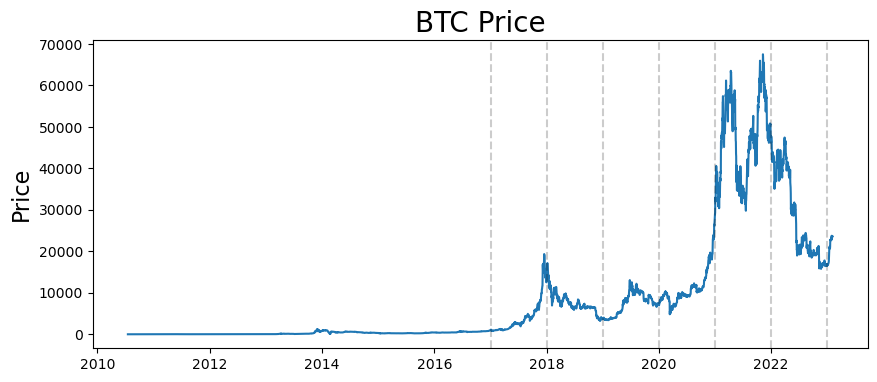

In [20]:
plt.figure(figsize=(10,4))
plt.plot(btc_price)
plt.title('BTC Price', fontsize=20)
plt.ylabel('Price', fontsize=16)

for year in range(2017,2024):
    plt.axvline(pd.to_datetime(str(year)+'-01-01'), color='k', linestyle='--', alpha=0.2)

In [23]:
btc_price = btc_price['2017-01-01':]

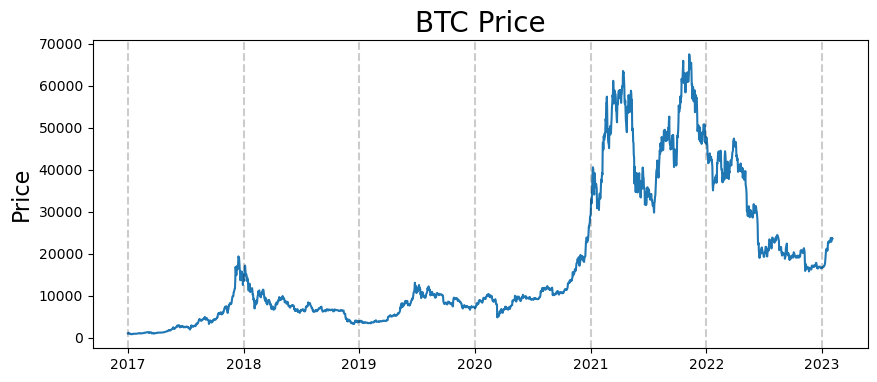

In [24]:
plt.figure(figsize=(10,4))
plt.plot(btc_price)
plt.title('BTC Price', fontsize=20)
plt.ylabel('Price', fontsize=16)

for year in range(2017,2024):
    plt.axvline(pd.to_datetime(str(year)+'-01-01'), color='k', linestyle='--', alpha=0.2)

In [25]:
from datetime import timedelta, datetime
from time import time

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX

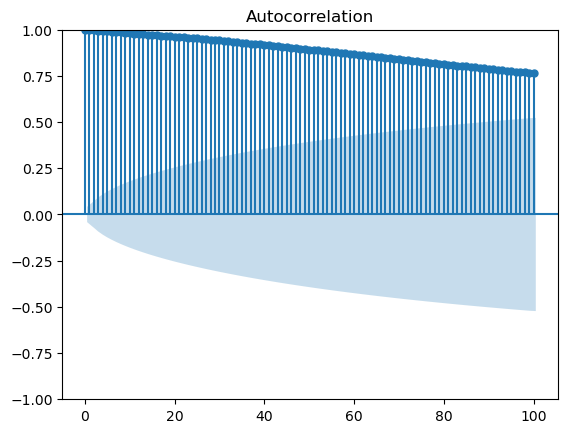

In [27]:
acf_plot = plot_acf(btc_price, lags=100)

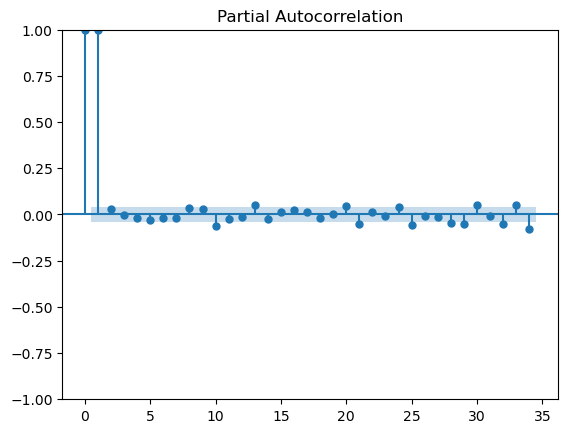

In [29]:
pacf_plot = plot_pacf(btc_price, method='ywm')

In [30]:
from statsmodels.tsa.stattools import adfuller

def perform_adf_test(series):
    result = adfuller(series)
    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])

perform_adf_test(btc_price)

ADF Statistic: -1.653909
p-value: 0.455003


In [31]:
first_diff = btc_price.diff()[1:]

In [32]:
perform_adf_test(first_diff)

ADF Statistic: -7.529036
p-value: 0.000000


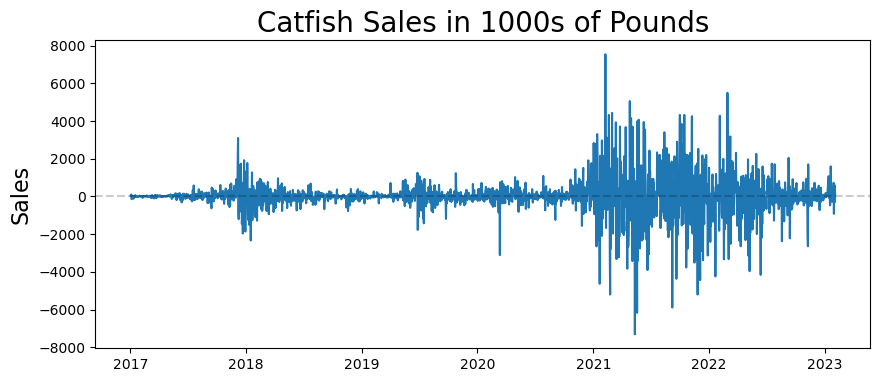

In [34]:
plt.figure(figsize=(10,4))
plt.plot(first_diff)
plt.title('Catfish Sales in 1000s of Pounds', fontsize=20)
plt.ylabel('Sales', fontsize=16)
plt.axhline(0, color='k', linestyle='--', alpha=0.2)

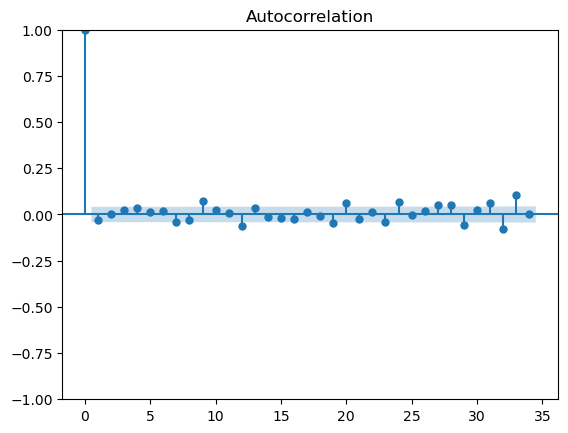

In [35]:
acf_plot = plot_acf(first_diff)

c:\Users\equipo\miniconda3\envs\development\Lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


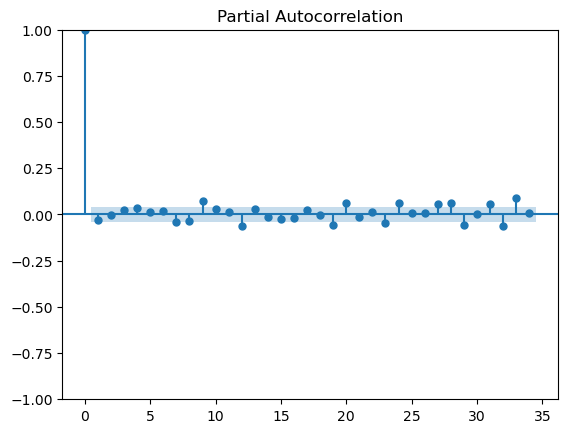

In [36]:
pacf_plot = plot_pacf(first_diff)

In [37]:
# get train and test sets
train_end = datetime(2022,12,31)
test_end = datetime(2023,2,3)

train_data = first_diff[:train_end]
test_data = first_diff[train_end + timedelta(days=1):test_end]

In [38]:
train_data

Date
2017-01-02     21.6
2017-01-03     16.3
2017-01-04    102.1
2017-01-05   -146.1
2017-01-06   -103.1
              ...  
2022-12-27   -212.0
2022-12-28   -159.9
2022-12-29     90.2
2022-12-30    -29.2
2022-12-31    -69.8
Freq: D, Name: Price, Length: 2190, dtype: float64

In [39]:
test_data

Date
2023-01-01      81.0
2023-01-02      55.9
2023-01-03      -0.1
2023-01-04     177.9
2023-01-05     -22.3
2023-01-06     121.1
2023-01-07      -7.3
2023-01-08     175.4
2023-01-09      61.1
2023-01-10     259.0
2023-01-11     503.2
2023-01-12     909.0
2023-01-13    1075.7
2023-01-14    1031.2
2023-01-15     -78.4
2023-01-16     304.4
2023-01-17     -47.1
2023-01-18    -466.5
2023-01-19     410.6
2023-01-20    1596.0
2023-01-21      98.5
2023-01-22     -67.9
2023-01-23     207.7
2023-01-24    -283.0
2023-01-25     422.6
2023-01-26     -39.1
2023-01-27      58.6
2023-01-28     -46.7
2023-01-29     725.2
2023-01-30    -920.9
2023-01-31     292.9
2023-02-01     600.5
2023-02-02    -298.0
2023-02-03     144.5
Freq: D, Name: Price, dtype: float64

In [40]:
print(train_data.size)
print(test_data.size)

2190
34


In [41]:
# create the model with lag 1 and MA 0
model = ARIMA(train_data, order=(0,1,0))

In [42]:
#fit the model
start = time()
model_fit = model.fit()
end = time()
print('Model Fitting Time:', end - start)

Model Fitting Time: 0.5092825889587402


In [43]:
#summary of the model
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                  Price   No. Observations:                 2190
Model:                 ARIMA(0, 1, 0)   Log Likelihood              -18885.650
Date:                Sun, 05 Feb 2023   AIC                          37773.301
Time:                        16:30:11   BIC                          37778.992
Sample:                    01-02-2017   HQIC                         37775.381
                         - 12-31-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      1.824e+06   2.37e+04     77.045      0.000    1.78e+06    1.87e+06
Ljung-Box (L1) (Q):                 584.39   Jarque-Bera (JB):              7152.06
Prob(Q):                              0.00   Pr

In [44]:
#get prediction start and end dates
pred_start_date = test_data.index[0]
pred_end_date = test_data.index[-1]

In [45]:
#get the predictions and residuals
predictions = model_fit.predict(start=pred_start_date, end=pred_end_date)
residuals = test_data - predictions

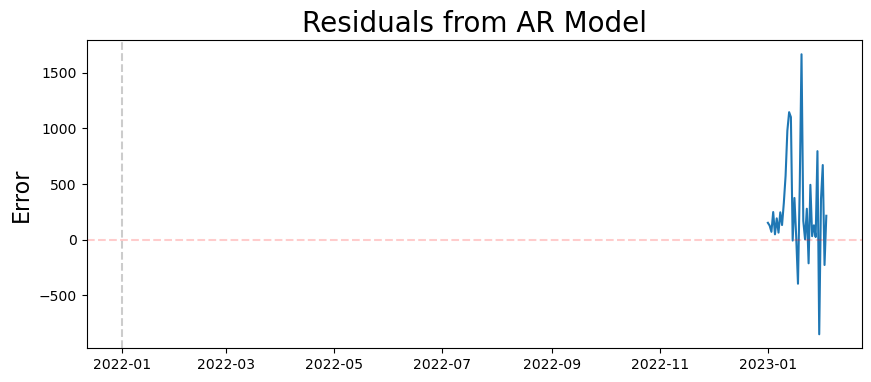

In [46]:
plt.figure(figsize=(10,4))
plt.plot(residuals)
plt.title('Residuals from AR Model', fontsize=20)
plt.ylabel('Error', fontsize=16)
plt.axhline(0, color='r', linestyle='--', alpha=0.2)


plt.axvline(pd.to_datetime('2022-01-01'), color='k', linestyle='--', alpha=0.2)

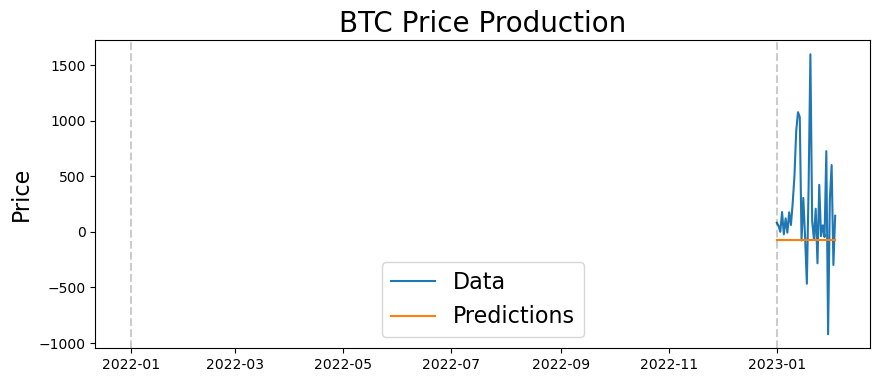

In [47]:
plt.figure(figsize=(10,4))

plt.plot(test_data)
plt.plot(predictions)

plt.legend(('Data', 'Predictions'), fontsize=16)

plt.title('BTC Price Production', fontsize=20)
plt.ylabel('Price', fontsize=16)

for year in range(2022,2024):
    plt.axvline(pd.to_datetime(str(year)+'-01-01'), color='k', linestyle='--', alpha=0.2)

In [48]:
print('Mean Absolute Percent Error:', round(np.mean(abs(residuals/test_data)), 4))

Mean Absolute Percent Error: 21.8794


In [49]:
print('Root Mean Squared Error:', np.sqrt(np.mean(residuals**2)))

Root Mean Squared Error: 539.4331204798123


In [51]:
# create the model
predictions_rolling = pd.Series()
for end_date in test_data.index:
    train_data = first_diff[:end_date-timedelta(days=1)]
    model = ARIMA(train_data, order=(0,1,0))
    model_fit = model.fit()
    pred = model_fit.predict(end_date)
    predictions_rolling.loc[end_date] = pred.loc[end_date]

C:\Users\equipo\AppData\Local\Temp\ipykernel_2456\3454591321.py:2: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  predictions_rolling = pd.Series()


In [52]:
residuals_rolling = test_data - predictions_rolling

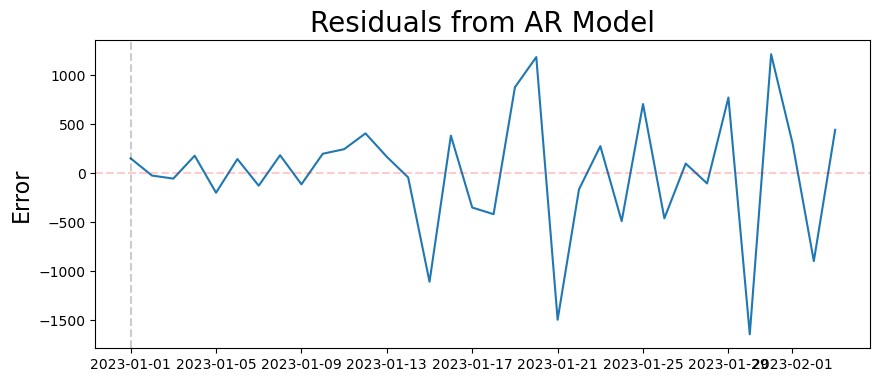

In [53]:
plt.figure(figsize=(10,4))
plt.plot(residuals_rolling)
plt.title('Residuals from AR Model', fontsize=20)
plt.ylabel('Error', fontsize=16)
plt.axhline(0, color='r', linestyle='--', alpha=0.2)

plt.axvline(pd.to_datetime('2023-01-01'), color='k', linestyle='--', alpha=0.2)

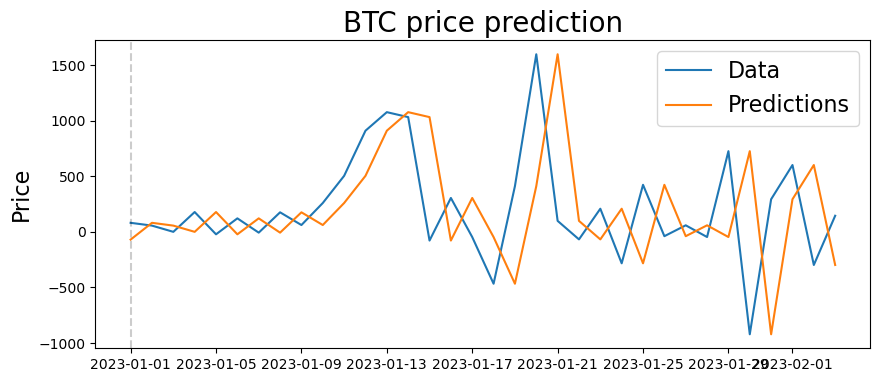

In [54]:
plt.figure(figsize=(10,4))

plt.plot(test_data)
plt.plot(predictions_rolling)

plt.legend(('Data', 'Predictions'), fontsize=16)

plt.title('BTC price prediction', fontsize=20)
plt.ylabel('Price', fontsize=16)

plt.axvline(pd.to_datetime('2023-01-01'), color='k', linestyle='--', alpha=0.2)

In [210]:
start_date = datetime(2023, 2, 4)
num_days = 5
dates = np.array([start_date + timedelta(days=x) for x in range(num_days)])

print(dates)

[datetime.datetime(2023, 2, 4, 0, 0) datetime.datetime(2023, 2, 5, 0, 0)
 datetime.datetime(2023, 2, 6, 0, 0) datetime.datetime(2023, 2, 7, 0, 0)
 datetime.datetime(2023, 2, 8, 0, 0)]


In [211]:
new_test_data = pd.concat([test_data,pd.Series(index=dates)]) 

C:\Users\equipo\AppData\Local\Temp\ipykernel_9652\182868161.py:1: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_test_data = pd.concat([test_data,pd.Series(index=dates)])


In [212]:
new_test_data.tail(31)

2023-01-09    17180.1
2023-01-10    17439.1
2023-01-11    17942.3
2023-01-12    18851.3
2023-01-13    19927.0
2023-01-14    20958.2
2023-01-15    20879.8
2023-01-16    21184.2
2023-01-17    21137.1
2023-01-18    20670.6
2023-01-19    21081.2
2023-01-20    22677.2
2023-01-21    22775.7
2023-01-22    22707.8
2023-01-23    22915.5
2023-01-24    22632.5
2023-01-25    23055.1
2023-01-26    23016.0
2023-01-27    23074.6
2023-01-28    23027.9
2023-01-29    23753.1
2023-01-30    22832.2
2023-01-31    23125.1
2023-02-01    23725.6
2023-02-02    23427.6
2023-02-03    23572.1
2023-02-04        NaN
2023-02-05        NaN
2023-02-06        NaN
2023-02-07        NaN
2023-02-08        NaN
dtype: float64

In [213]:
# create the model
predictions_rolling = pd.Series()
for end_date in new_test_data.index:
    train_data = btc_price[:end_date-timedelta(days=1)]
    model = ARIMA(train_data, order=(1,0,0))
    model_fit = model.fit()
    pred = model_fit.predict(end_date)
    predictions_rolling.loc[end_date] = pred.loc[end_date]

C:\Users\equipo\AppData\Local\Temp\ipykernel_9652\1174254713.py:2: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  predictions_rolling = pd.Series()


In [214]:
residuals_rolling = test_data - predictions_rolling

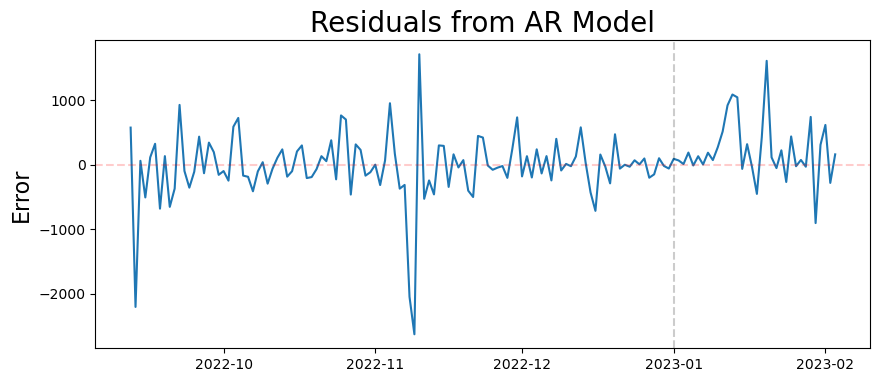

In [215]:
plt.figure(figsize=(10,4))
plt.plot(residuals_rolling)
plt.title('Residuals from AR Model', fontsize=20)
plt.ylabel('Error', fontsize=16)
plt.axhline(0, color='r', linestyle='--', alpha=0.2)

plt.axvline(pd.to_datetime('2023-01-01'), color='k', linestyle='--', alpha=0.2)

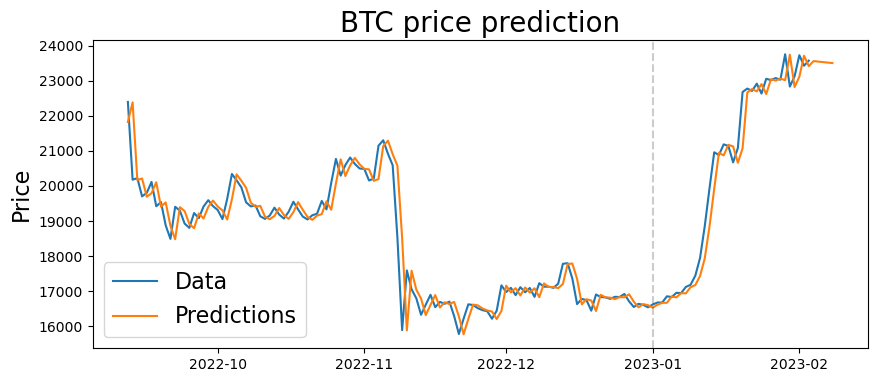

In [216]:
plt.figure(figsize=(10,4))

plt.plot(test_data)
plt.plot(predictions_rolling)

plt.legend(('Data', 'Predictions'), fontsize=16)

plt.title('BTC price prediction', fontsize=20)
plt.ylabel('Price', fontsize=16)

plt.axvline(pd.to_datetime('2023-01-01'), color='k', linestyle='--', alpha=0.2)

In [217]:
btc_price[:'2023-01-31']

Date
2010-07-18        0.1
2010-07-19        0.1
2010-07-20        0.1
2010-07-21        0.1
2010-07-22        0.1
               ...   
2023-01-27    23074.6
2023-01-28    23027.9
2023-01-29    23753.1
2023-01-30    22832.2
2023-01-31    23125.1
Freq: D, Name: Price, Length: 4581, dtype: float64

In [218]:
btc_price_monthly = btc_price[:'2023-01-31'].resample('M').last()
btc_price_monthly

Date
2010-07-31        0.1
2010-08-31        0.1
2010-09-30        0.1
2010-10-31        0.2
2010-11-30        0.2
               ...   
2022-09-30    19423.0
2022-10-31    20496.3
2022-11-30    17163.9
2022-12-31    16537.4
2023-01-31    23125.1
Freq: M, Name: Price, Length: 151, dtype: float64

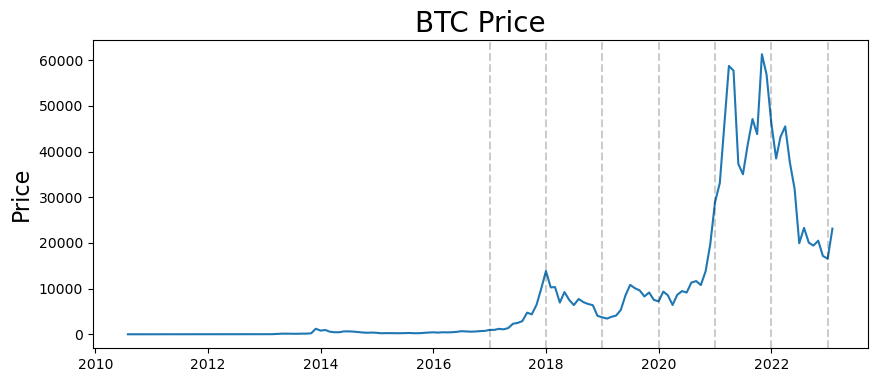

In [219]:
plt.figure(figsize=(10,4))
plt.plot(btc_price_monthly)
plt.title('BTC Price', fontsize=20)
plt.ylabel('Price', fontsize=16)

for year in range(2017,2024):
    plt.axvline(pd.to_datetime(str(year)+'-01-01'), color='k', linestyle='--', alpha=0.2)

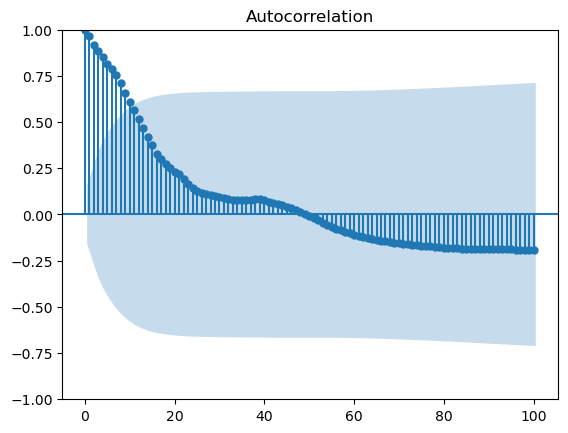

In [220]:
acf_plot = plot_acf(btc_price_monthly, lags=100)

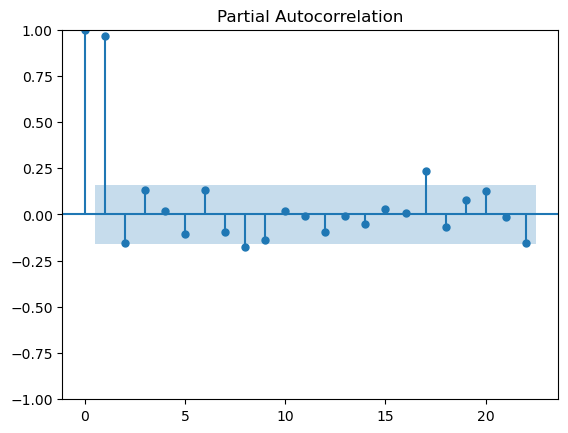

In [221]:
pacf_plot = plot_pacf(btc_price_monthly, method='ywm')

In [224]:
# get train and test sets
train_end = datetime(2022,7,31)
test_end = datetime(2023,1,31)

train_data = btc_price_monthly[:train_end]
test_data = btc_price_monthly['2022-08-31':test_end]

In [225]:
train_data

Date
2010-07-31        0.1
2010-08-31        0.1
2010-09-30        0.1
2010-10-31        0.2
2010-11-30        0.2
               ...   
2022-03-31    45525.0
2022-04-30    37650.0
2022-05-31    31793.4
2022-06-30    19926.6
2022-07-31    23303.4
Freq: M, Name: Price, Length: 145, dtype: float64

In [226]:
test_data

Date
2022-08-31    20043.9
2022-09-30    19423.0
2022-10-31    20496.3
2022-11-30    17163.9
2022-12-31    16537.4
2023-01-31    23125.1
Freq: M, Name: Price, dtype: float64

In [227]:
print(train_data.size)
print(test_data.size)

145
6


In [228]:
# create the model with lag 1 and MA 0
model = ARIMA(train_data, order=(1,0,0))

In [229]:
#fit the model
start = time()
model_fit = model.fit()
end = time()
print('Model Fitting Time:', end - start)

Model Fitting Time: 0.27199864387512207


In [230]:
#summary of the model
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                  Price   No. Observations:                  145
Model:                 ARIMA(1, 0, 0)   Log Likelihood               -1393.916
Date:                Sun, 05 Feb 2023   AIC                           2793.832
Time:                        08:46:46   BIC                           2802.763
Sample:                    07-31-2010   HQIC                          2797.461
                         - 07-31-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       8256.2587   1.81e+04      0.455      0.649   -2.73e+04    4.38e+04
ar.L1          0.9673      0.018     53.775      0.000       0.932       1.003
sigma2      1.292e+07    181.380   7.12e+04      0.0

In [231]:
#get prediction start and end dates
pred_start_date = test_data.index[0]
pred_end_date = test_data.index[-1]

In [232]:
#get the predictions and residuals
predictions = model_fit.predict(start=pred_start_date, end=pred_end_date)
residuals = test_data - predictions

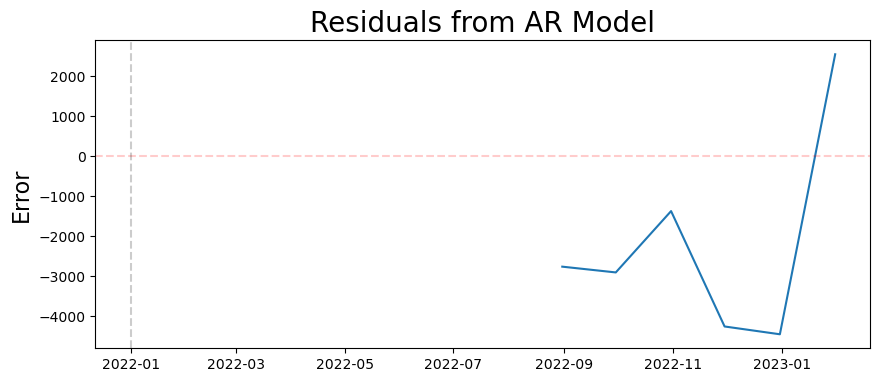

In [233]:
plt.figure(figsize=(10,4))
plt.plot(residuals)
plt.title('Residuals from AR Model', fontsize=20)
plt.ylabel('Error', fontsize=16)
plt.axhline(0, color='r', linestyle='--', alpha=0.2)


plt.axvline(pd.to_datetime('2022-01-01'), color='k', linestyle='--', alpha=0.2)

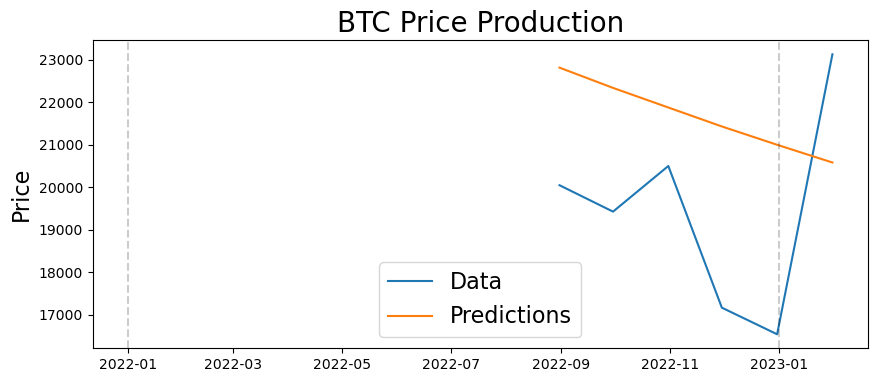

In [234]:
plt.figure(figsize=(10,4))

plt.plot(test_data)
plt.plot(predictions)

plt.legend(('Data', 'Predictions'), fontsize=16)

plt.title('BTC Price Production', fontsize=20)
plt.ylabel('Price', fontsize=16)

for year in range(2022,2024):
    plt.axvline(pd.to_datetime(str(year)+'-01-01'), color='k', linestyle='--', alpha=0.2)

In [235]:
print('Mean Absolute Percent Error:', round(np.mean(abs(residuals/test_data)), 4))

Mean Absolute Percent Error: 0.1639


In [236]:
print('Root Mean Squared Error:', np.sqrt(np.mean(residuals**2)))

Root Mean Squared Error: 3229.040937080439


In [246]:
# create the model
predictions_rolling = pd.Series()
for end_date in test_data.index:
    train_data = btc_price_monthly[:end_date-timedelta(weeks=4)]
    model = ARIMA(train_data, order=(1,0,0))
    model_fit = model.fit()
    pred = model_fit.predict(end_date)
    predictions_rolling.loc[end_date] = pred.loc[end_date]

C:\Users\equipo\AppData\Local\Temp\ipykernel_9652\1472296811.py:2: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  predictions_rolling = pd.Series()


In [247]:
residuals_rolling = test_data - predictions_rolling

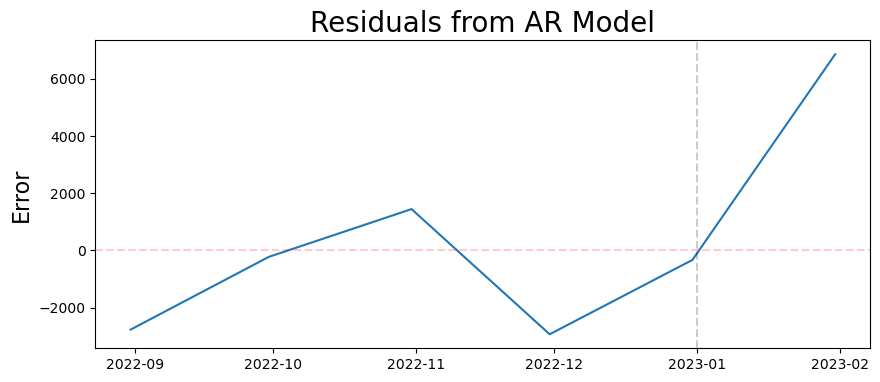

In [248]:
plt.figure(figsize=(10,4))
plt.plot(residuals_rolling)
plt.title('Residuals from AR Model', fontsize=20)
plt.ylabel('Error', fontsize=16)
plt.axhline(0, color='r', linestyle='--', alpha=0.2)

plt.axvline(pd.to_datetime('2023-01-01'), color='k', linestyle='--', alpha=0.2)

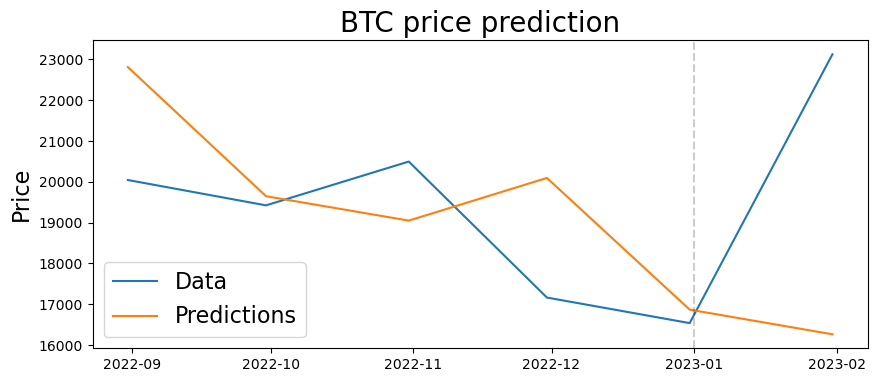

In [249]:
plt.figure(figsize=(10,4))

plt.plot(test_data)
plt.plot(predictions_rolling)

plt.legend(('Data', 'Predictions'), fontsize=16)

plt.title('BTC price prediction', fontsize=20)
plt.ylabel('Price', fontsize=16)

plt.axvline(pd.to_datetime('2023-01-01'), color='k', linestyle='--', alpha=0.2)

In [241]:
dates = pd.date_range(start='2023-02-28', end='2023-03-31', freq='M')
new_test_data = pd.concat([test_data, pd.Series(index=dates)])

new_test_data.tail()

C:\Users\equipo\AppData\Local\Temp\ipykernel_9652\163818407.py:2: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_test_data = pd.concat([test_data, pd.Series(index=dates)])


2022-11-30    17163.9
2022-12-31    16537.4
2023-01-31    23125.1
2023-02-28        NaN
2023-03-31        NaN
Freq: M, dtype: float64

In [242]:
# create the model
predictions_rolling = pd.Series()
for end_date in new_test_data.index:
    train_data = btc_price_monthly[:end_date-timedelta(days=1)]
    model = ARIMA(train_data, order=(1,0,0))
    model_fit = model.fit()
    pred = model_fit.predict(end_date)
    predictions_rolling.loc[end_date] = pred.loc[end_date]

C:\Users\equipo\AppData\Local\Temp\ipykernel_9652\3674560739.py:2: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  predictions_rolling = pd.Series()


In [243]:
residuals_rolling = test_data - predictions_rolling

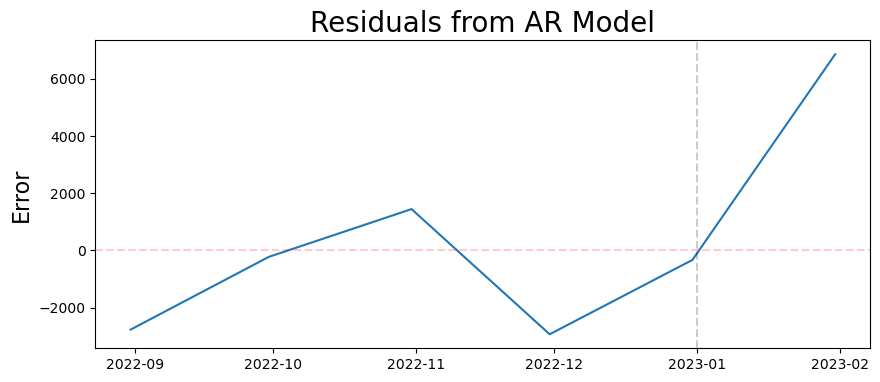

In [244]:
plt.figure(figsize=(10,4))
plt.plot(residuals_rolling)
plt.title('Residuals from AR Model', fontsize=20)
plt.ylabel('Error', fontsize=16)
plt.axhline(0, color='r', linestyle='--', alpha=0.2)

plt.axvline(pd.to_datetime('2023-01-01'), color='k', linestyle='--', alpha=0.2)

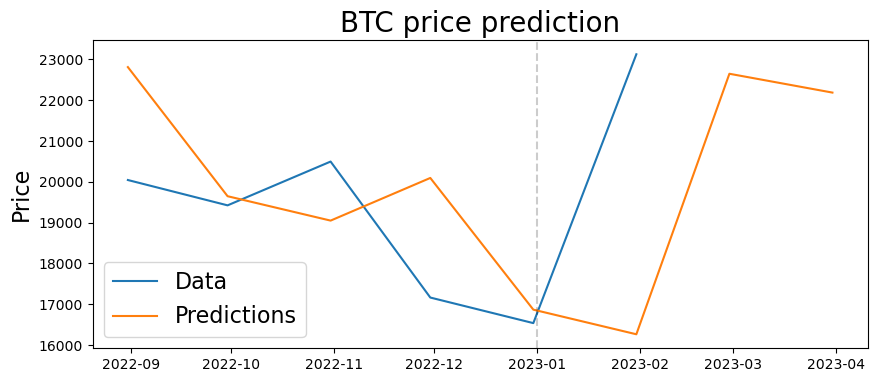

In [245]:
plt.figure(figsize=(10,4))

plt.plot(test_data)
plt.plot(predictions_rolling)

plt.legend(('Data', 'Predictions'), fontsize=16)

plt.title('BTC price prediction', fontsize=20)
plt.ylabel('Price', fontsize=16)

plt.axvline(pd.to_datetime('2023-01-01'), color='k', linestyle='--', alpha=0.2)